In [758]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [759]:
#Read file
data = pd.read_csv("./google app/googleplaystore.csv",encoding='ISO-8859-15')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [760]:
print("The data shape is " + str(data.shape))

#calculate the rows before data cleaning
before_cleaning_rows=data.shape[0] 

print("There are {} rows before data cleaning".format(before_cleaning_rows))

The data shape is (10841, 13)
There are 10841 rows before data cleaning


In [761]:
#check the NaN
print(data.isnull().sum().sort_values(ascending=False))

Rating            1466
Android Ver         64
Current Ver          9
Category             8
Last Updated         1
Genres               1
Content Rating       1
Type                 1
Price                0
Installs             0
Size                 0
Reviews              0
App                  0
dtype: int64


In [762]:
#clean the NaN
data.dropna(axis = 0 ,how = 'any',inplace = True)

In [763]:
#check Nan again
print(data.isnull().sum().sort_values(ascending=False))

Android Ver       0
Current Ver       0
Last Updated      0
Genres            0
Content Rating    0
Price             0
Type              0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64


In [764]:
print("The data shape is " + str(data.shape))   

#calculate the rows after data cleaning
after_cleaning_rows=data.shape[0]

#print the rows that were deleted
print("{} rows were deleted after data cleaning"
      .format(before_cleaning_rows-after_cleaning_rows))

The data shape is (9307, 13)
1534 rows were deleted after data cleaning


In [765]:
#delete the same value with key 'App'
print(data.shape)
data.drop_duplicates(subset=['App'],keep='first', inplace=True)
print(data.shape)

(9307, 13)
(8143, 13)


In [766]:
print(data['Category'].unique())
print(data['Genres'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & 

In [767]:
del data['Genres']
del data['Current Ver']
del data['Android Ver']

In [768]:
data.Installs = data.Installs.str.replace(',','')
data.Installs = data.Installs.str.replace('+','')
data.Installs = pd.to_numeric(data.Installs)

In [769]:
print(data.Installs.head())

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


In [770]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,15-Jan-18
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,20-Jun-18


In [771]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [772]:
print(data['Last Updated'].head())

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]


In [773]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,2018-01-15
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,2018-06-20


In [774]:
print('Varies with device in Size',len(data[data.Size == 'Varies with device']))

#replace 'Varies with device' to NaN
data['Size'].replace('Varies with device', np.nan, inplace = True )

print('Varies with device in Size',len(data[data.Size == 'Varies with device']))

Varies with device in Size 1161
Varies with device in Size 0


In [775]:
#data.Size = data.Size.str.replace("M",'000')  #convert M to "000"
#data.Size = data.Size.str.replace("k","")     #convert k to ""
#data.Size = data.Size.str.replace(".","")     #convert . to ""
#data.Size = pd.to_numeric(data.Size)          #convert data.Size to int
#data.Size = data.Size/1000                    #divided data.Size by 1000,let unit become Mb
data['Size'].replace('Varies with device', np.nan, inplace = True ) 
data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)
data['Size']= data['Size']/1000000 

In [776]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,2018-01-15
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,2018-06-20


In [777]:
print(data.Price.unique())
data.Price = data.Price.str.replace('$','')
data.Price = pd.to_numeric(data.Price)
print(data.Price.unique())

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']
[  0.     4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99
   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99
  29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95
   4.49   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76
   4.84   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99
  18.99 389.99   8.49   1

In [778]:
data.Rating = pd.to_numeric(data.Rating)
data.Reviews = pd.to_numeric(data.Reviews)

In [779]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20


In [780]:
#Read file
comment = pd.read_csv("./google app/googleplaystore_user_reviews.csv",encoding='ISO-8859-15')
comment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [781]:
commet_before_cleaning_rows=comment.shape[0]
print("before cleaning commet.shape =",comment.shape)
comment.dropna(axis = 0 ,how = 'any',inplace = True,subset=['Translated_Review'])
commet_after_cleaning_rows=comment.shape[0]
print("after cleaning commet.shape =",comment.shape)

#print the rows that were deleted
print("{} rows were deleted after data cleaning"
      .format(commet_before_cleaning_rows-commet_after_cleaning_rows))

before cleaning commet.shape = (64295, 5)
after cleaning commet.shape = (37427, 5)
26868 rows were deleted after data cleaning


In [782]:
del comment["Sentiment_Subjectivity"]

In [783]:
final_table = pd.merge(data, comment, on='App', how='inner')
print("final_table.shape:",final_table.shape)
final_table.head(10)

final_table.shape: (34139, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Translated_Review,Sentiment,Sentiment_Polarity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,It bad >:(,Negative,-0.725000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,like,Neutral,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,I love colors inspyering,Positive,0.500000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,I hate,Negative,-0.800000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,omgggggg,Neutral,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,It cute.,Positive,0.500000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,I love,Positive,0.500000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,Love,Positive,0.500000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,I love enjoyable fun,Positive,0.433333


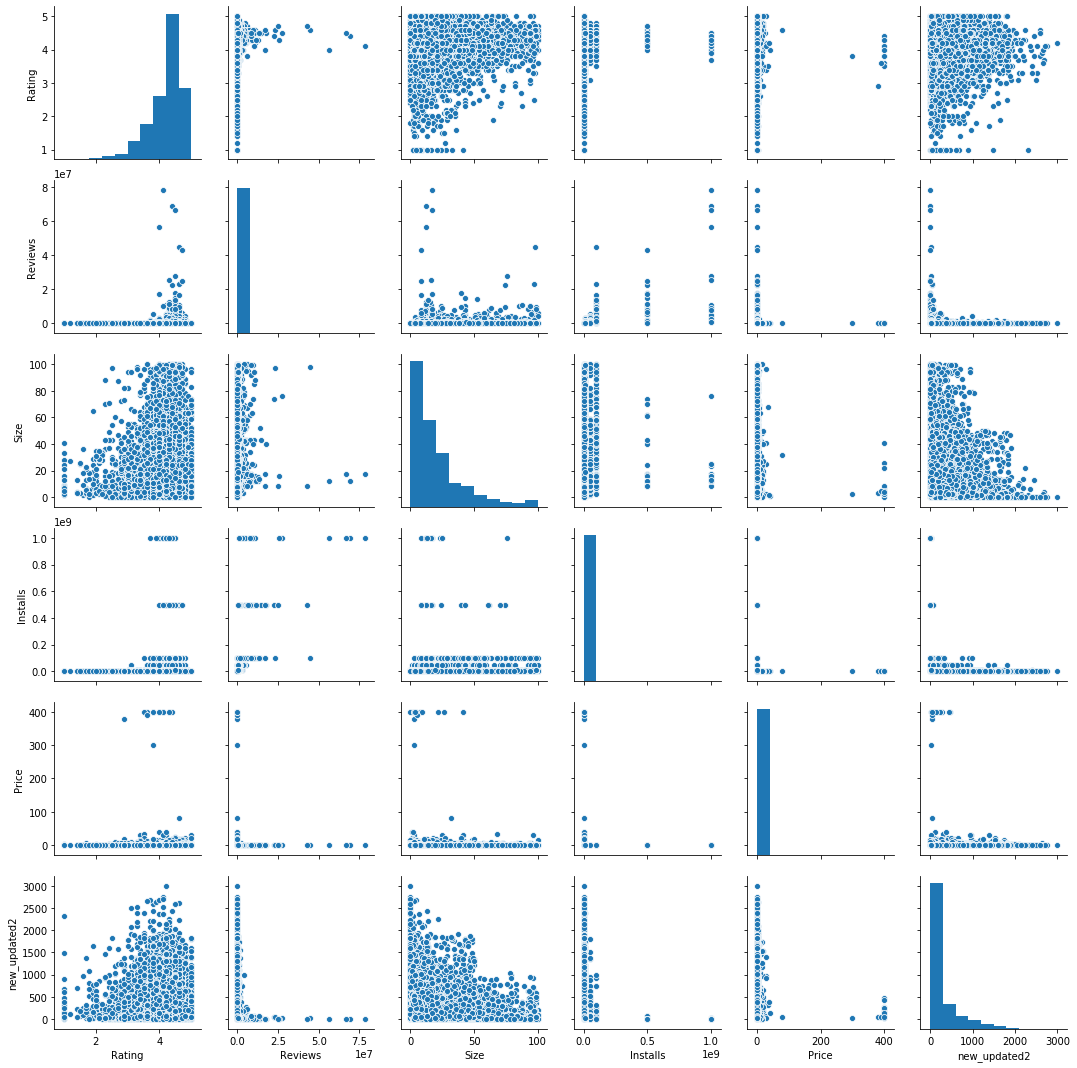

In [829]:
sns.pairplot(data)

<module 'matplotlib.pyplot' from 'C:\\Users\\willi\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

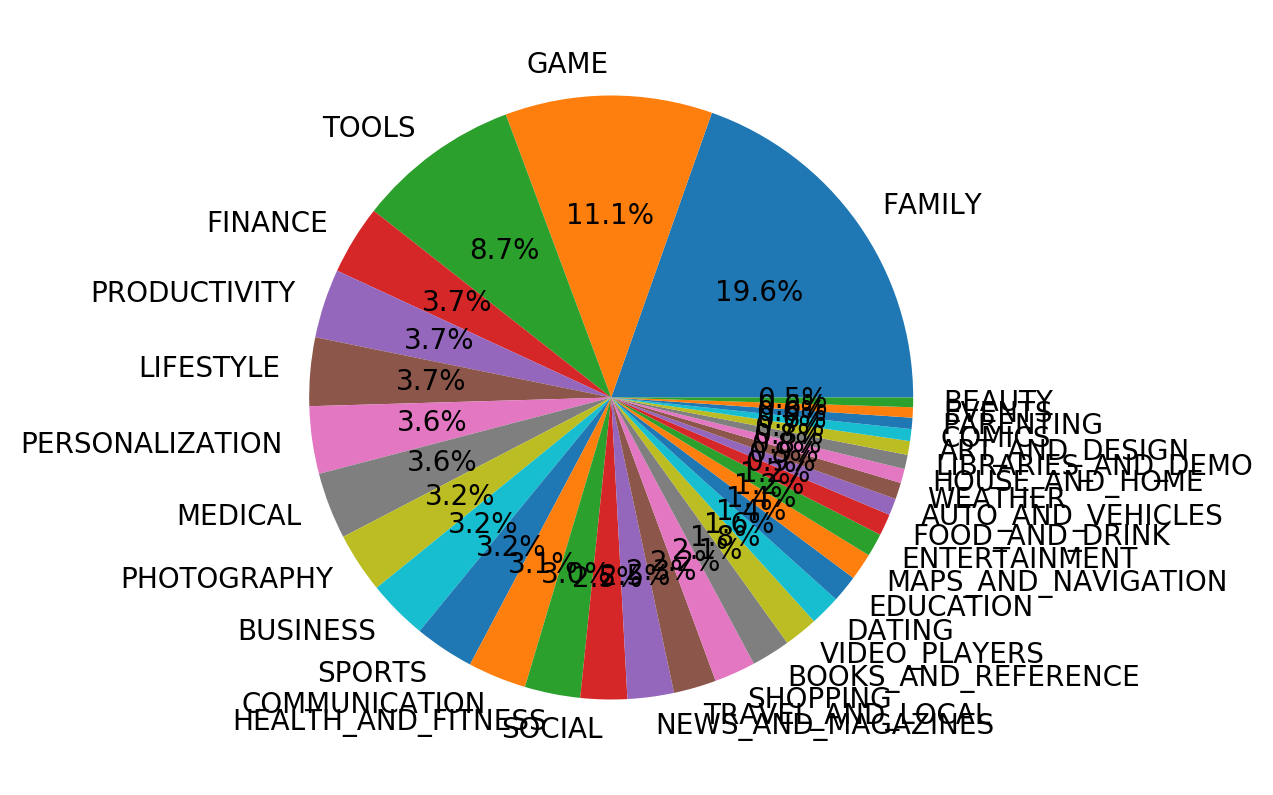

In [785]:
plt.figure(figsize = (5,5),dpi = 200)
plt.pie(data.Category.value_counts(),labels=data.Category.value_counts().index,autopct='%1.1f%%')
plt

7546
4367    I'm Rich - Trump Edition
Name: App, dtype: object
8143
App               8143
Category          8143
Rating            8143
Reviews           8143
Size              8143
Installs          8143
Type              8143
Price             8143
Content Rating    8143
Last Updated      8143
dtype: int64
[  0.     4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99
   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99
  29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95
   4.49   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76
   4.84   4.77   1.61   2.5    1.59   6.49   1.29 299.99 379.99  37.99
  18.99 389.99   8.49   1.75  14.     2.     3.08   2.59  19.4    3.9
   4.59  15.46   3.04  13.99   4.29   3.28   4.6    1.     2.95   2.9
   1.97   2.56   1.2 ]


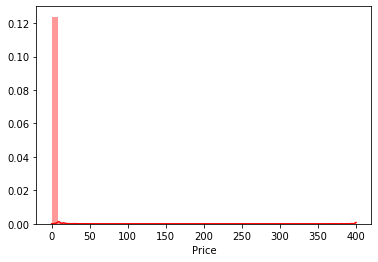

In [786]:
plt.figure()
g = sns.distplot(data.Price, color="Red")
print(data[data["Price"]==0]["Price"].count())
print(data[data["Price"]==400]["App"])
print(data["Price"].count())
print(data.count())
print(data.Price.unique())

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

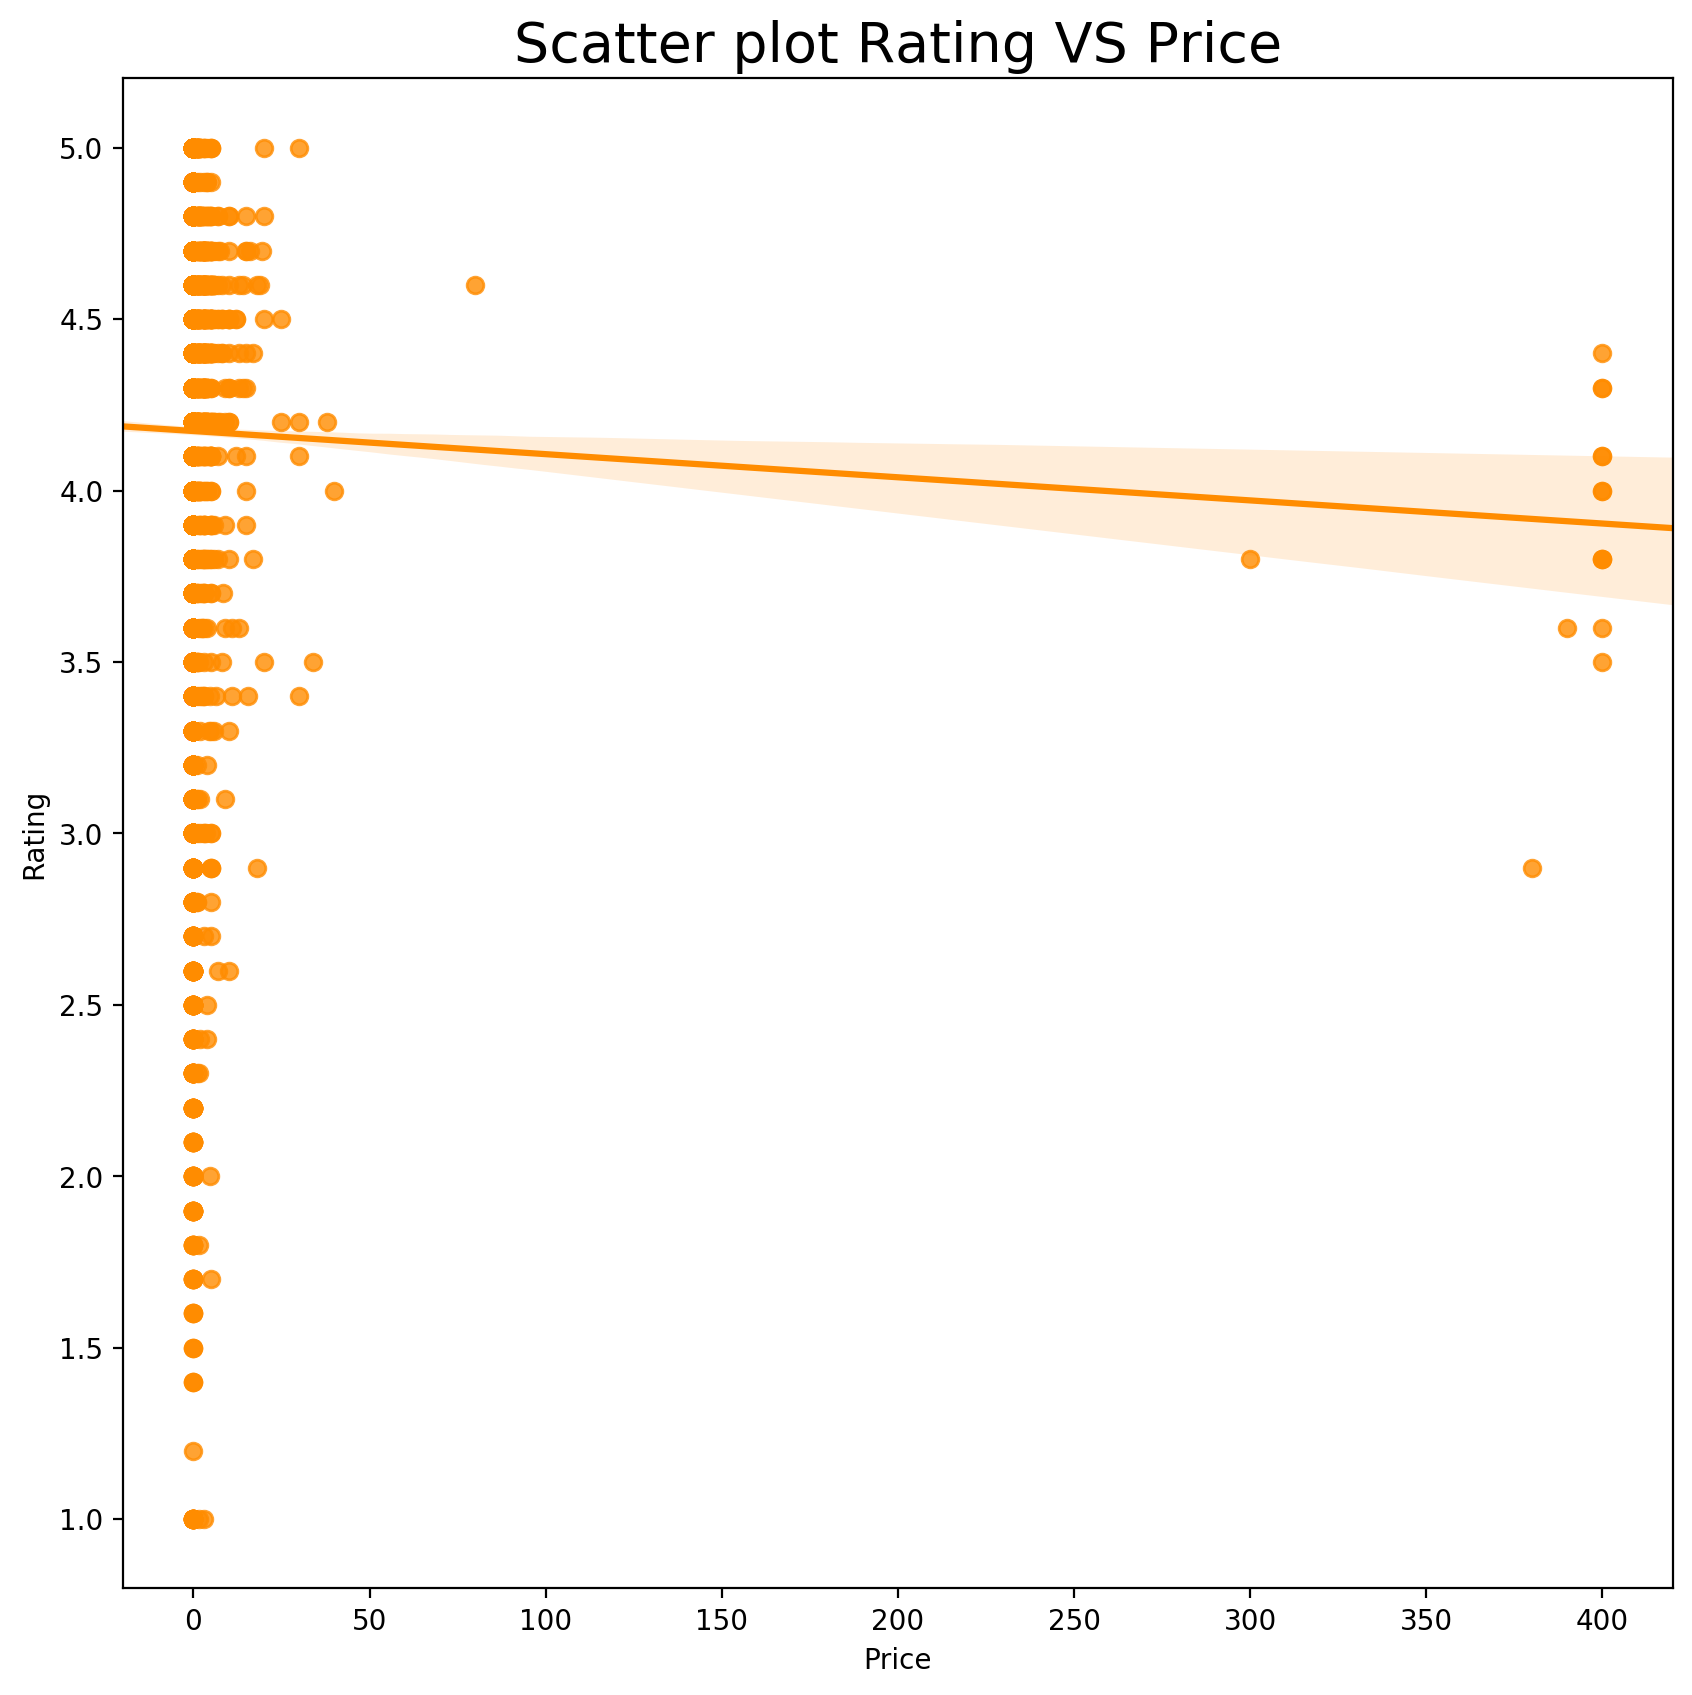

In [985]:
plt.figure(figsize = (10,10),dpi=200)
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data)
plt.title('Scatter plot Rating VS Price',size = 20)

Text(0.5, 1.0, 'Scatter plot Installs VS Price')

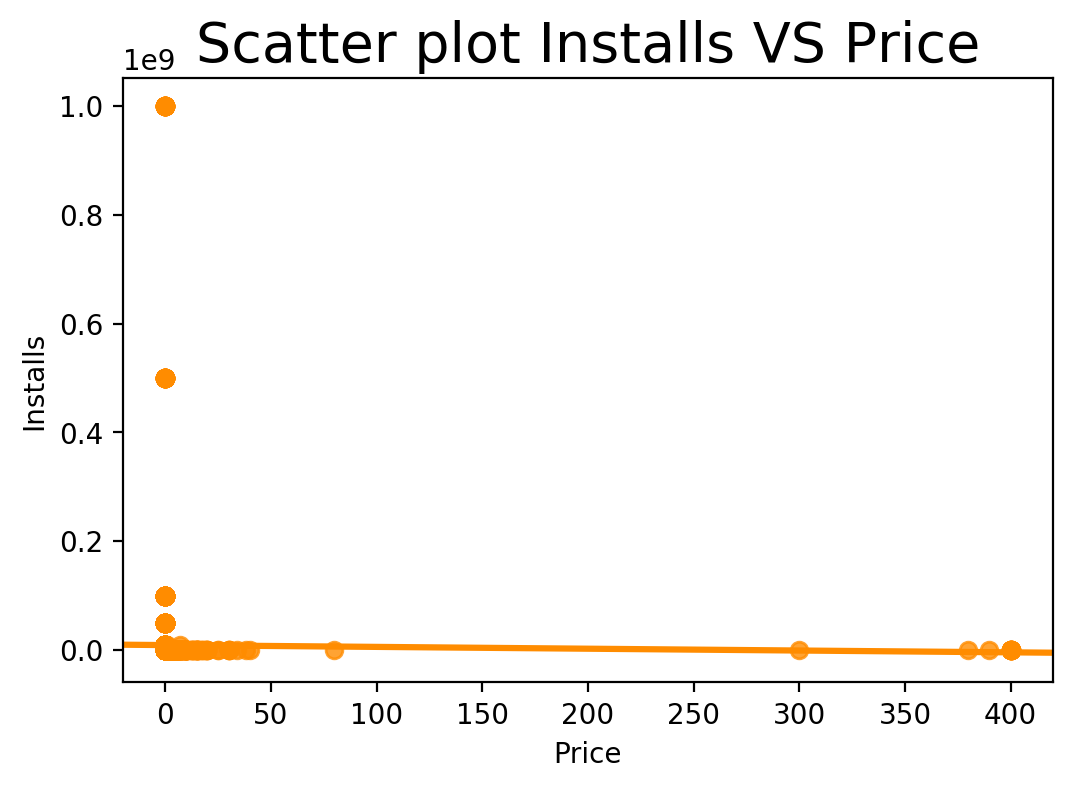

In [987]:
plt.figure(dpi=200)
sns.regplot(x="Price", y="Installs", color = 'darkorange',data=data)
plt.title('Scatter plot Installs VS Price',size = 20)

Text(0.5, 1.0, 'Scatter plot Size VS Rating')

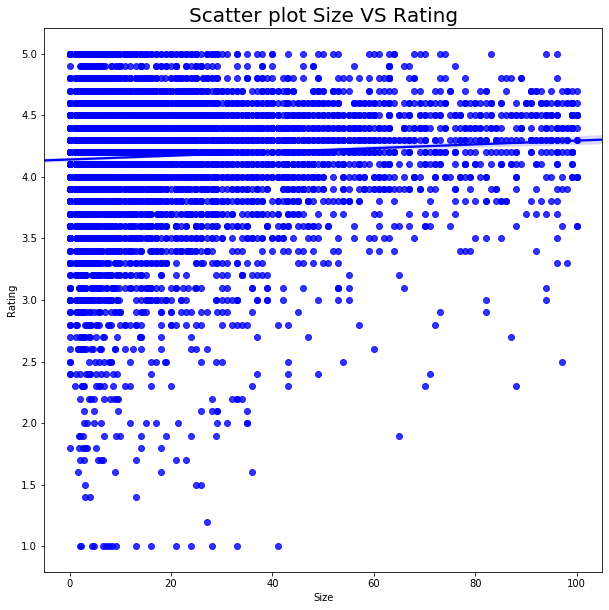

In [788]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", color = 'b', data=data)
plt.title('Scatter plot Size VS Rating',size = 20)

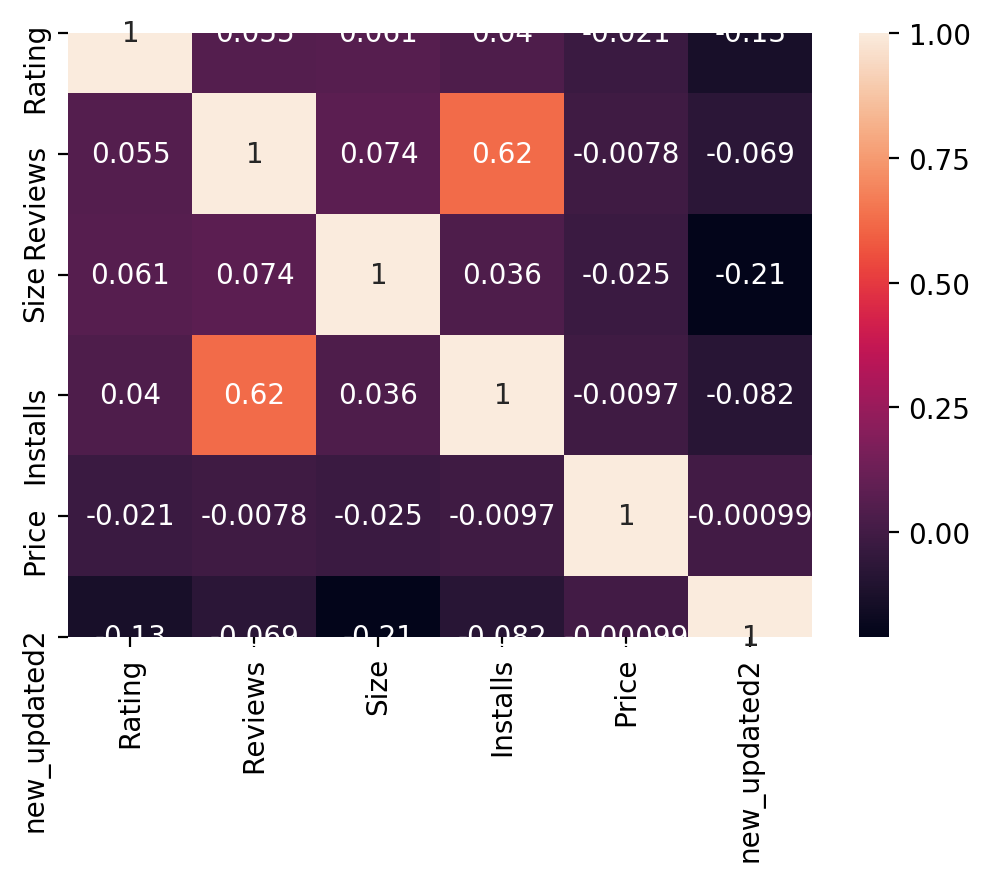

In [825]:
plt.figure(dpi=200)
sns.heatmap(data.corr(), annot=True)

In [790]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 0 to 10840
Data columns (total 10 columns):
App               8143 non-null object
Category          8143 non-null object
Rating            8143 non-null float64
Reviews           8143 non-null int64
Size              8143 non-null float64
Installs          8143 non-null int64
Type              8143 non-null object
Price             8143 non-null float64
Content Rating    8143 non-null object
Last Updated      8143 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 1019.8+ KB


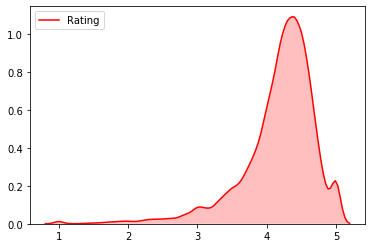

In [791]:
g = sns.kdeplot(data.Rating, color="Red", shade = True)

Coefficients:
 [109559.09313513]


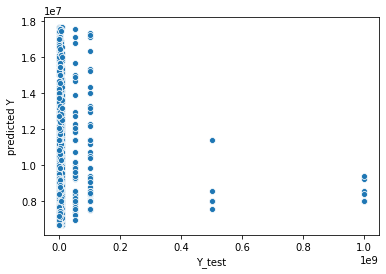

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X=data[["Size"]]
y=data["Installs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Coefficients:\n",lm.coef_)
predictions = lm.predict(X_test)
result=sns.scatterplot(y_test,predictions)
result.set(xlabel='Y_test', ylabel='predicted Y')
result

In [793]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14312203.209312033
MSE: 3711268654266885.5
RMSE: 60920182.651292875


In [794]:
coeff_df2 = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df2

,Coefficient
Size,109559.093135


Text(0.5, 1.0, 'Scatter plot Reviews VS Rating')

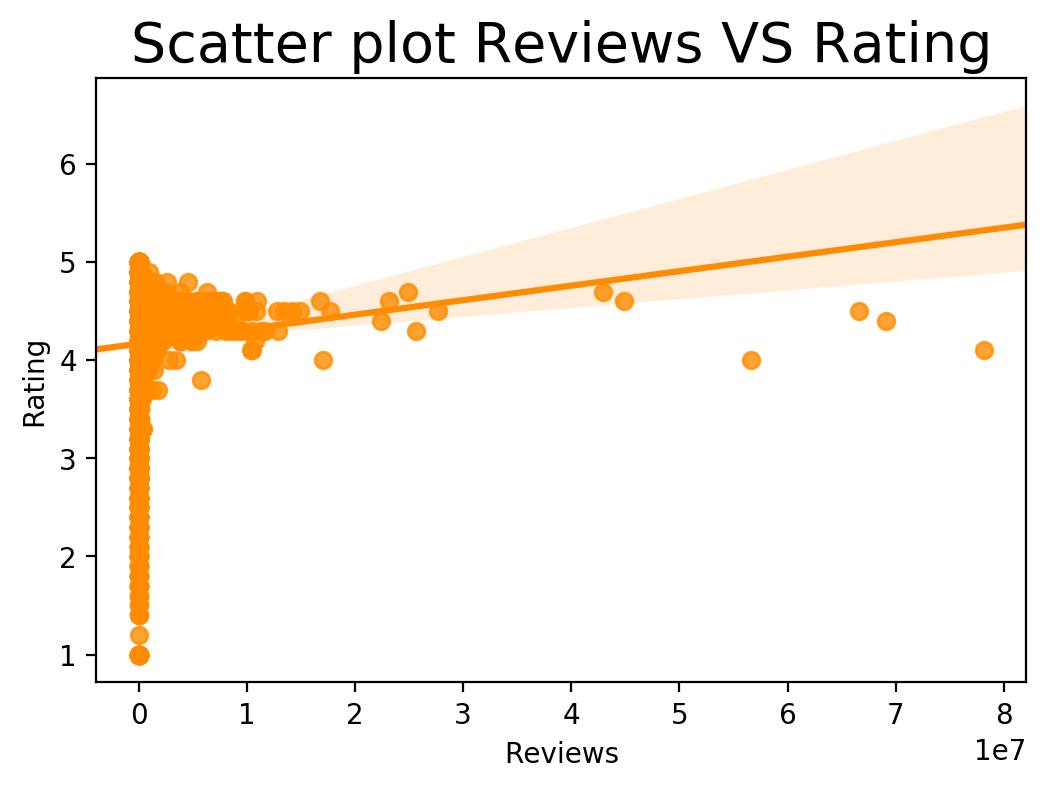

In [795]:
plt.figure(dpi=200)
sns.regplot(x=data["Reviews"], y=data["Rating"], color = 'darkorange',)
plt.title('Scatter plot Reviews VS Rating',size = 20)

Text(0.5, 1.0, 'Scatter plot Reviews VS Installs')

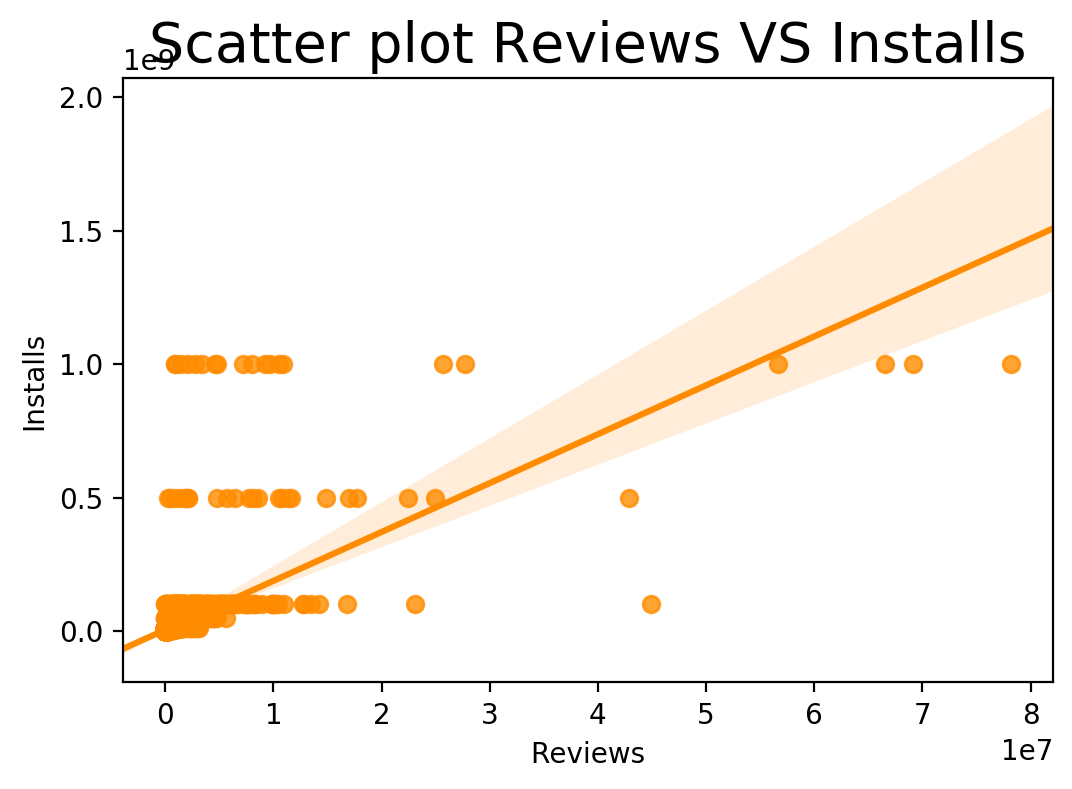

In [983]:
plt.figure(dpi=200)
sns.regplot(x=data["Reviews"], y=data["Installs"], color = 'darkorange',)
plt.title('Scatter plot Reviews VS Installs',size = 20)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
DATING
EDUCATION
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
FAMILY
MEDICAL
SHOPPING
SPORTS
PERSONALIZATION
PARENTING
WEATHER
MAPS_AND_NAVIGATION


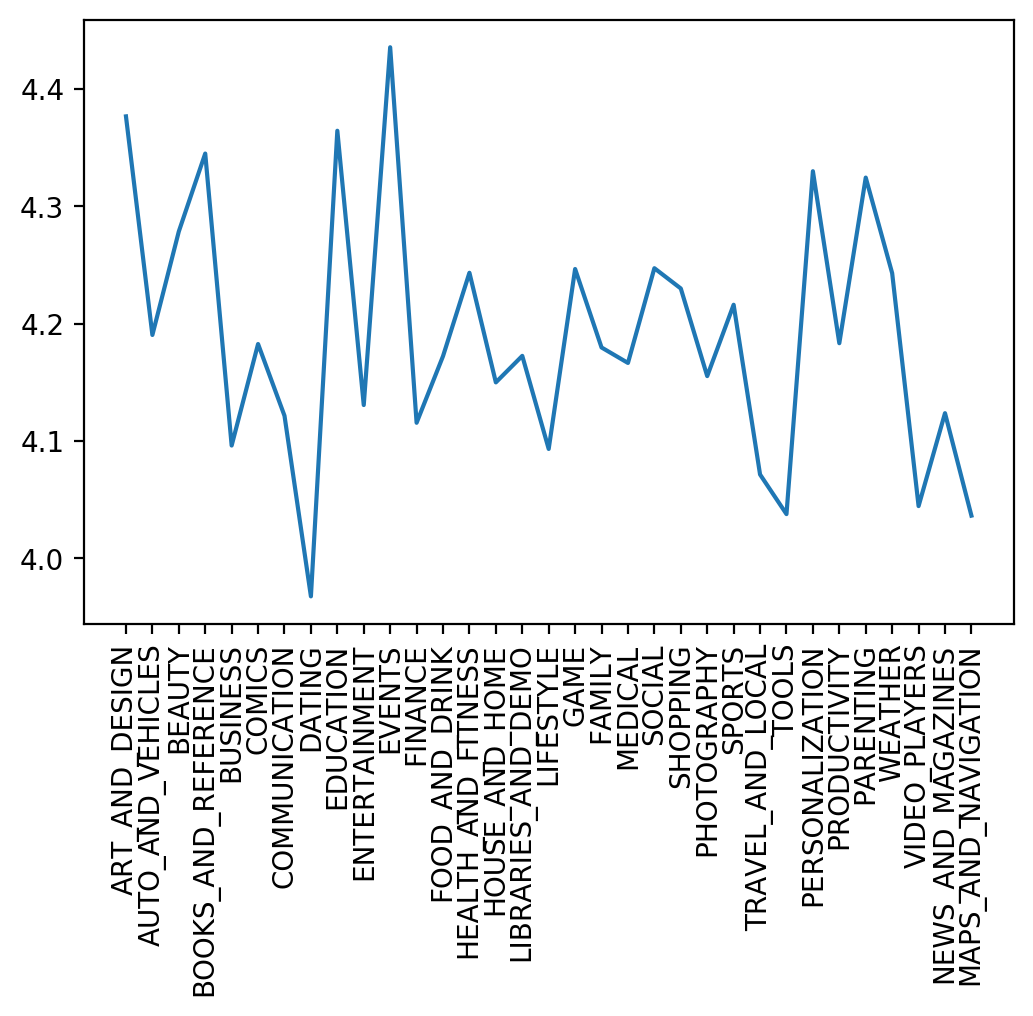

In [993]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
list1=[]
list2=[]

for i in data["Category"].unique():
    list1.append(data[data["Category"]==i]["Rating"].mean())
    #print(i,"mean=",data[data["Category"]==i]["Rating"].mean())
    list2.append(data[data["Category"]==i]["Installs"].mean())
    if (data[data["Category"]==i]["Installs"].mean()<10000000):
        print(i)
    

plt.plot(data["Category"].unique(),list1)


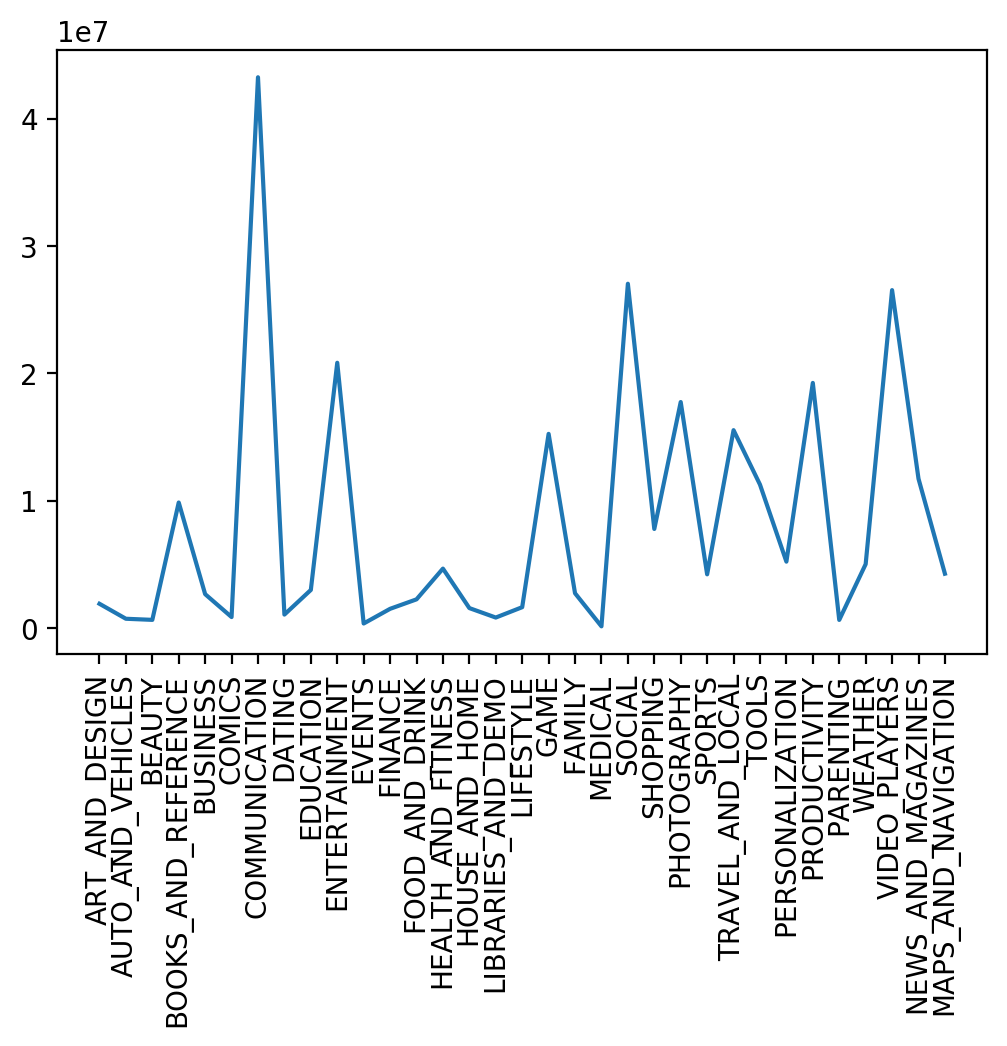

In [990]:
plt.figure(dpi=200)
plt.xticks(rotation=90)
plt.plot(data["Category"].unique(),list2)

Coefficients:
 [1.3803481e-08]


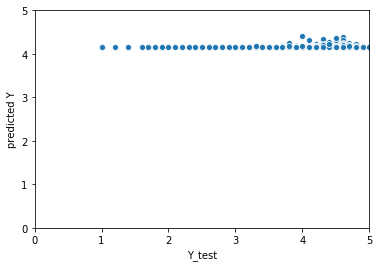

In [798]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.xlim((0,5))
plt.ylim((0,5))
X=data[["Reviews"]]
y=data["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Coefficients:\n",lm.coef_)
predictions = lm.predict(X_test)
result=sns.scatterplot(y_test,predictions)
result.set(xlabel='Y_test', ylabel='predicted Y')
result

In [799]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.377824724117087
MSE: 0.28919402902834196
RMSE: 0.5377676347906611


In [800]:
coeff_df2 = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df2

,Coefficient
Reviews,1.380348e-08


In [801]:
print(data["Reviews"].max())

78158306


In [802]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(college.drop('Private', axis = 1))
kmeans.cluster_centers_
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(college["Cluster"],kmeans.labels_))
print(classification_report(college["Cluster"],kmeans.labels_))
'''

'\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=2)\nkmeans.fit(college.drop(\'Private\', axis = 1))\nkmeans.cluster_centers_\nfrom sklearn.metrics import confusion_matrix,classification_report\nprint(confusion_matrix(college["Cluster"],kmeans.labels_))\nprint(classification_report(college["Cluster"],kmeans.labels_))\n'

In [803]:
data["Rating"].mean()

4.173068893528182

In [804]:
data["Last Updated"].max()

Timestamp('2018-08-08 00:00:00')

In [805]:
type(data["Last Updated"].max()-data["Last Updated"].min())

pandas._libs.tslibs.timedeltas.Timedelta

In [817]:
data["new_updated"]=data["Last Updated"].max()-data["Last Updated"]

In [818]:
a=[]
k=0
for i in data["new_updated"]:
    k=k+1
    a.append(i.days)
s1=pd.Series(a,index=data.index)

print(k)
data["new_updated2"]=s1
data["new_updated2"]

8143


0         213
1         205
2           7
3          61
4          49
         ... 
10834     416
10836     379
10837      33
10839    1297
10840      14
Name: new_updated2, Length: 8143, dtype: int64

Text(0.5, 1.0, 'Scatter plot Last_updated VS Rating')

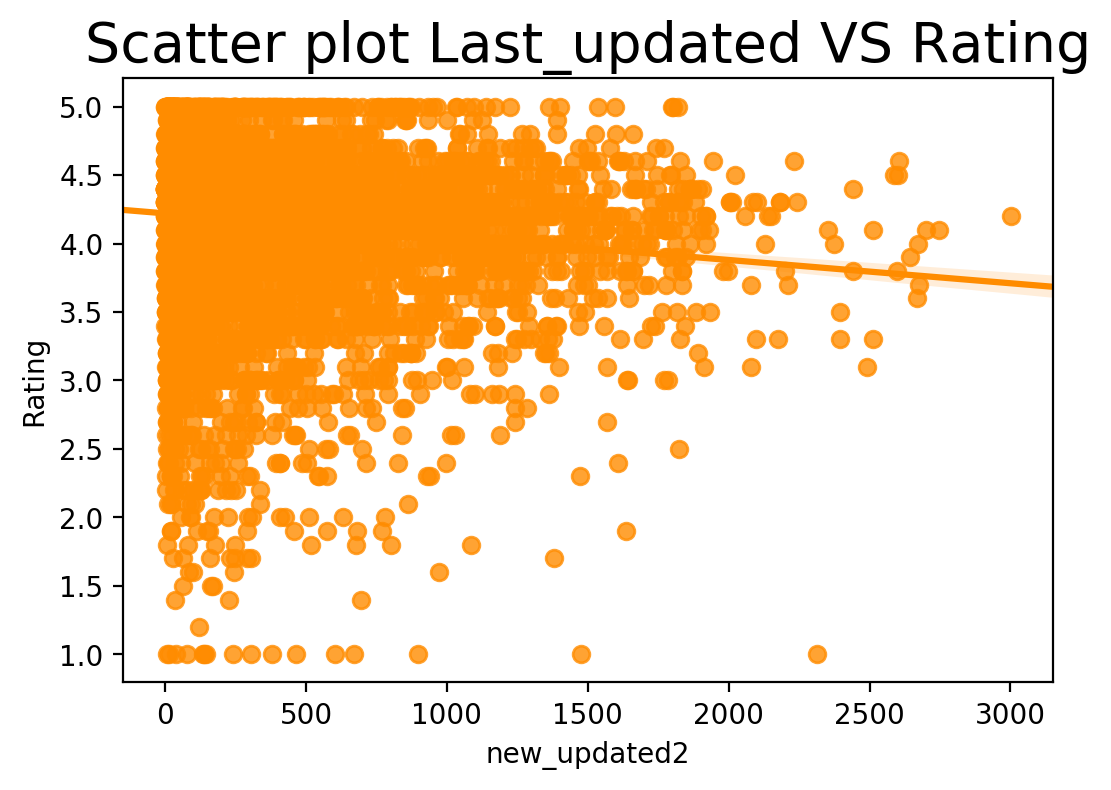

In [823]:
plt.figure(dpi=200)
sns.regplot(x=data["new_updated2"], y=data["Rating"], color = 'darkorange',)
plt.title('Scatter plot Last_updated VS Rating',size = 20)

Text(0.5, 1.0, 'Scatter plot Last_updated VS Installs')

<Figure size 432x288 with 0 Axes>

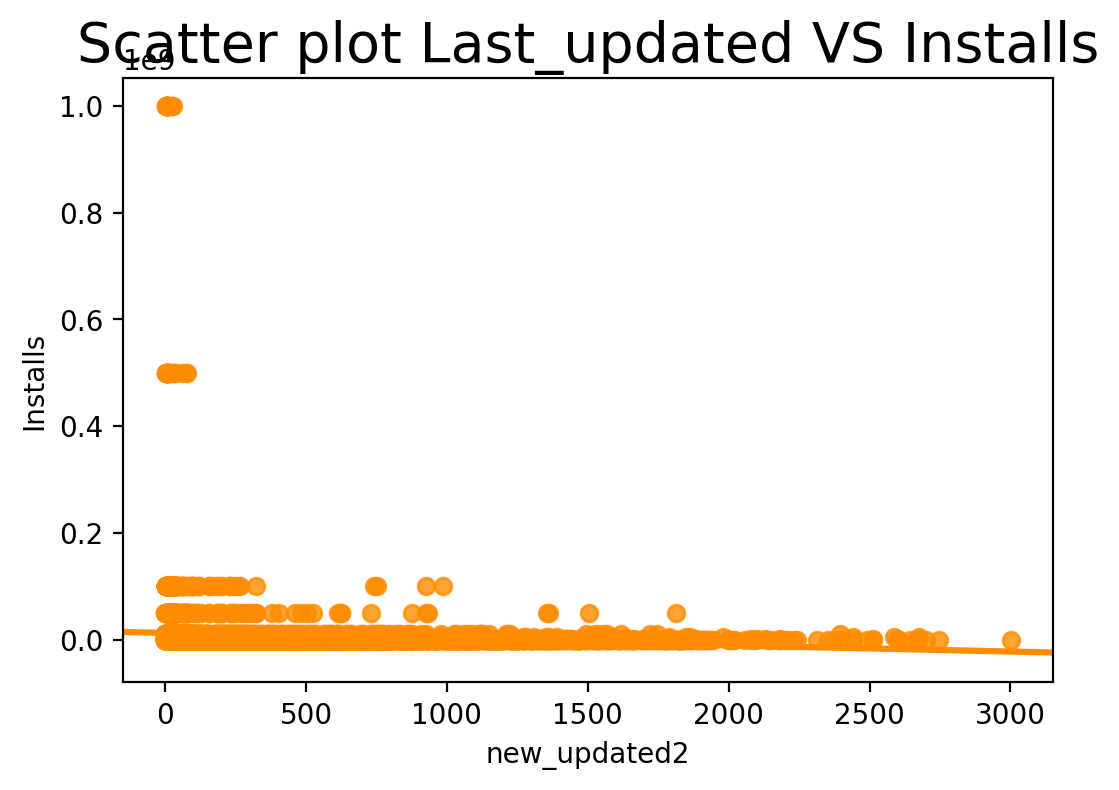

In [828]:
plt.figure()
plt.figure(dpi=200)
sns.regplot(x=data["new_updated2"], y=data["Installs"], color = 'darkorange')
plt.title('Scatter plot Last_updated VS Installs',size = 20)

In [958]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,new_updated,new_updated2,new_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,2018-01-07,213 days,213,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,2018-01-15,205 days,205,0
2,"U Launcher Lite ??FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,2018-08-01,7 days,7,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,2018-06-08,61 days,61,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800000,100000,Free,0.0,Everyone,2018-06-20,49 days,49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,2017-06-18,416 days,416,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,2017-07-25,379 days,379,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,2018-07-06,33 days,33,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14.157456,1000,Free,0.0,Mature 17+,2015-01-19,1297 days,1297,1


In [960]:
data["Installs"].mean()

9194529.864669042

In [ ]:
print()

In [872]:
b=[]
for i in data["Rating"]:
    if i > data["Rating"].mean():
        b.append(1)
    else:
        b.append(0)
s2=pd.Series(b,index=data.index)

data["new_rating"]=s2
data["new_rating"]

0        0
1        0
2        1
3        1
4        1
        ..
10834    0
10836    1
10837    1
10839    1
10840    1
Name: new_rating, Length: 8143, dtype: int64

In [940]:
df=data[["Size","Reviews","new_updated2","new_rating"]]
df

,Size,Reviews,new_updated2,new_rating
0,19.000000,159,213,0
1,14.000000,967,205,0
2,8.700000,87510,7,1
3,25.000000,215644,61,1
4,2.800000,967,49,1
...,...,...,...,...
10834,2.600000,7,416,0
10836,53.000000,38,379,1
10837,3.600000,4,33,1
10839,14.157456,114,1297,1


In [941]:
from sklearn.preprocessing import StandardScaler

In [942]:
scaler = StandardScaler()

In [943]:
scaler.fit(df.drop('new_rating',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [944]:
scaled_features = scaler.transform(df.drop('new_rating',axis=1))

In [945]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Size,Reviews,new_updated2
0,-0.107953,-0.128367,-0.152621
1,-0.342845,-0.127961,-0.172061
2,-0.591831,-0.084471,-0.653226
3,0.173917,-0.020080,-0.521999
4,-0.869003,-0.127961,-0.551161


In [946]:
from sklearn.model_selection import train_test_split

In [947]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['new_rating'],test_size=0.30)

In [948]:
from sklearn.neighbors import KNeighborsClassifier

In [949]:
knn = KNeighborsClassifier(n_neighbors=1)

In [950]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [951]:
pred = knn.predict(X_test)

In [952]:
from sklearn.metrics import classification_report,confusion_matrix

In [953]:
print(confusion_matrix(y_test,pred))

[[ 401  506]
 [ 517 1019]]


In [954]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       907
           1       0.67      0.66      0.67      1536

    accuracy                           0.58      2443
   macro avg       0.55      0.55      0.55      2443
weighted avg       0.58      0.58      0.58      2443



In [955]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

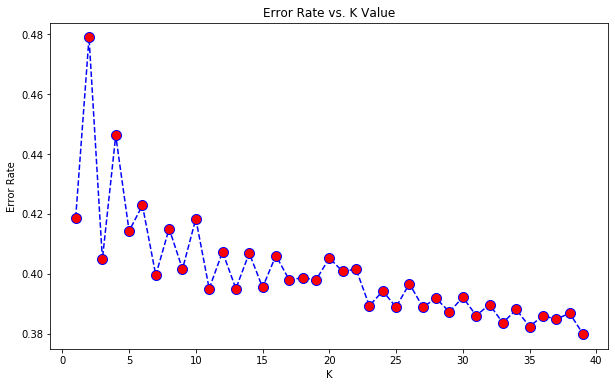

In [956]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [957]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=39
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 401  506]
 [ 517 1019]]


              precision    recall  f1-score   support

           0       0.44      0.44      0.44       907
           1       0.67      0.66      0.67      1536

    accuracy                           0.58      2443
   macro avg       0.55      0.55      0.55      2443
weighted avg       0.58      0.58      0.58      2443



In [968]:
c=[]
for i in data["Installs"]:
    if i > 500000:
        c.append(1)
    else:
        c.append(0)
s3=pd.Series(c,index=data.index)

data["new_Installs"]=s3
data["new_Installs"]

0        0
1        0
2        1
3        1
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    1
Name: new_Installs, Length: 8143, dtype: int64

In [969]:
df=data[["Size","Reviews","Price","new_updated2","new_Installs"]]
df

,Size,Reviews,Price,new_updated2,new_Installs
0,19.000000,159,0.0,213,0
1,14.000000,967,0.0,205,0
2,8.700000,87510,0.0,7,1
3,25.000000,215644,0.0,61,1
4,2.800000,967,0.0,49,0
...,...,...,...,...,...
10834,2.600000,7,0.0,416,0
10836,53.000000,38,0.0,379,0
10837,3.600000,4,0.0,33,0
10839,14.157456,114,0.0,1297,0


In [971]:
scaler = StandardScaler()
scaler.fit(df.drop('new_Installs',axis=1))
scaled_features = scaler.transform(df.drop('new_Installs',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Size,Reviews,Price,new_updated2
0,-0.107953,-0.128367,-0.061634,-0.152621
1,-0.342845,-0.127961,-0.061634,-0.172061
2,-0.591831,-0.084471,-0.061634,-0.653226
3,0.173917,-0.020080,-0.061634,-0.521999
4,-0.869003,-0.127961,-0.061634,-0.551161


In [972]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['new_Installs'],test_size=0.30)

In [973]:
knn = KNeighborsClassifier(n_neighbors=1)

In [974]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [975]:
pred = knn.predict(X_test)

In [976]:
print(confusion_matrix(y_test,pred))

[[1184  239]
 [ 295  725]]


In [977]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1423
           1       0.75      0.71      0.73      1020

    accuracy                           0.78      2443
   macro avg       0.78      0.77      0.77      2443
weighted avg       0.78      0.78      0.78      2443



In [978]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

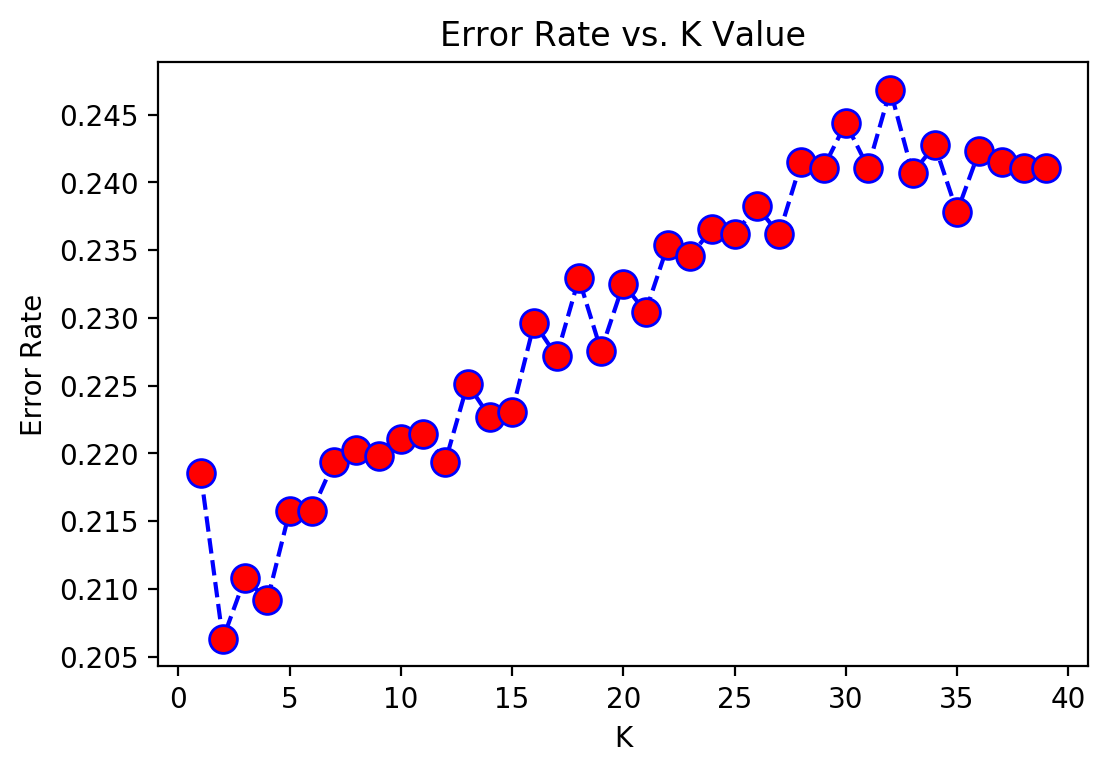

In [988]:
plt.figure(dpi=200)
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [982]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=39
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[1347   76]
 [ 428  592]]


              precision    recall  f1-score   support

           0       0.76      0.95      0.84      1423
           1       0.89      0.58      0.70      1020

    accuracy                           0.79      2443
   macro avg       0.82      0.76      0.77      2443
weighted avg       0.81      0.79      0.78      2443



Text(0.5, 1.0, 'Scatter plot Size VS Installs')

<Figure size 432x288 with 0 Axes>

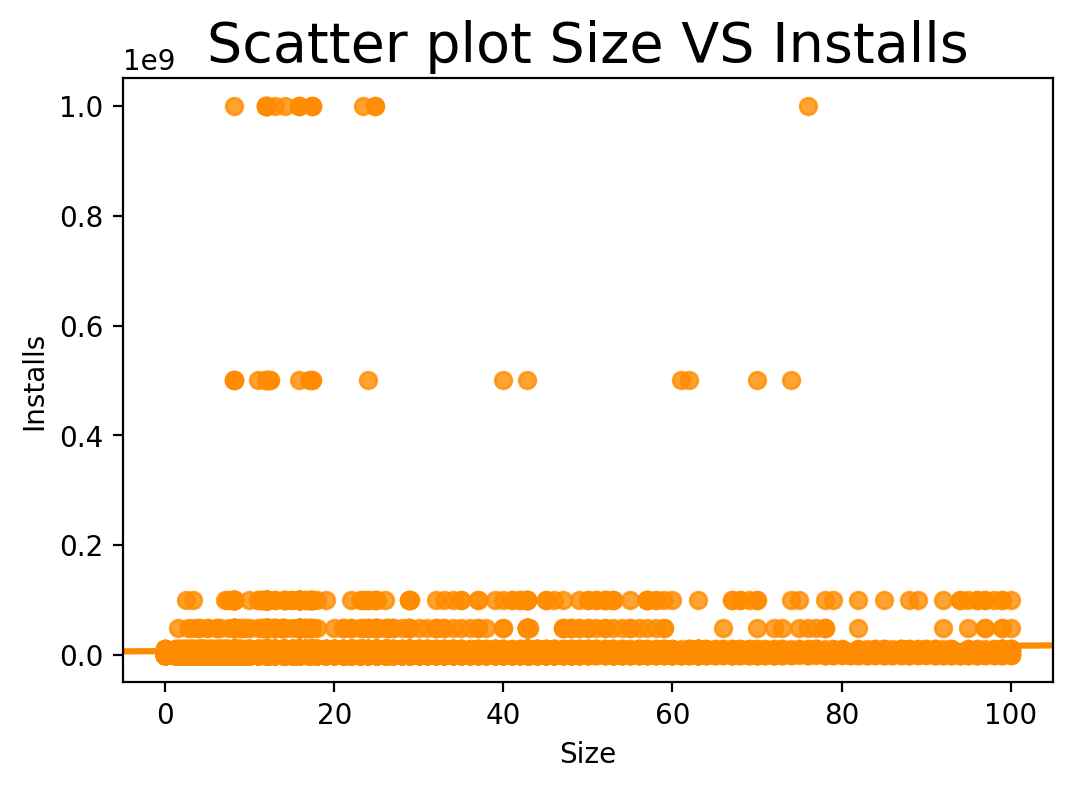

In [997]:
plt.figure()
plt.figure(dpi=200)
sns.regplot(x=data["Size"], y=data["Installs"], color = 'darkorange')
plt.title('Scatter plot Size VS Installs',size = 20)

Text(0.5, 1.0, 'Scatter plot Size VS Rating')

<Figure size 432x288 with 0 Axes>

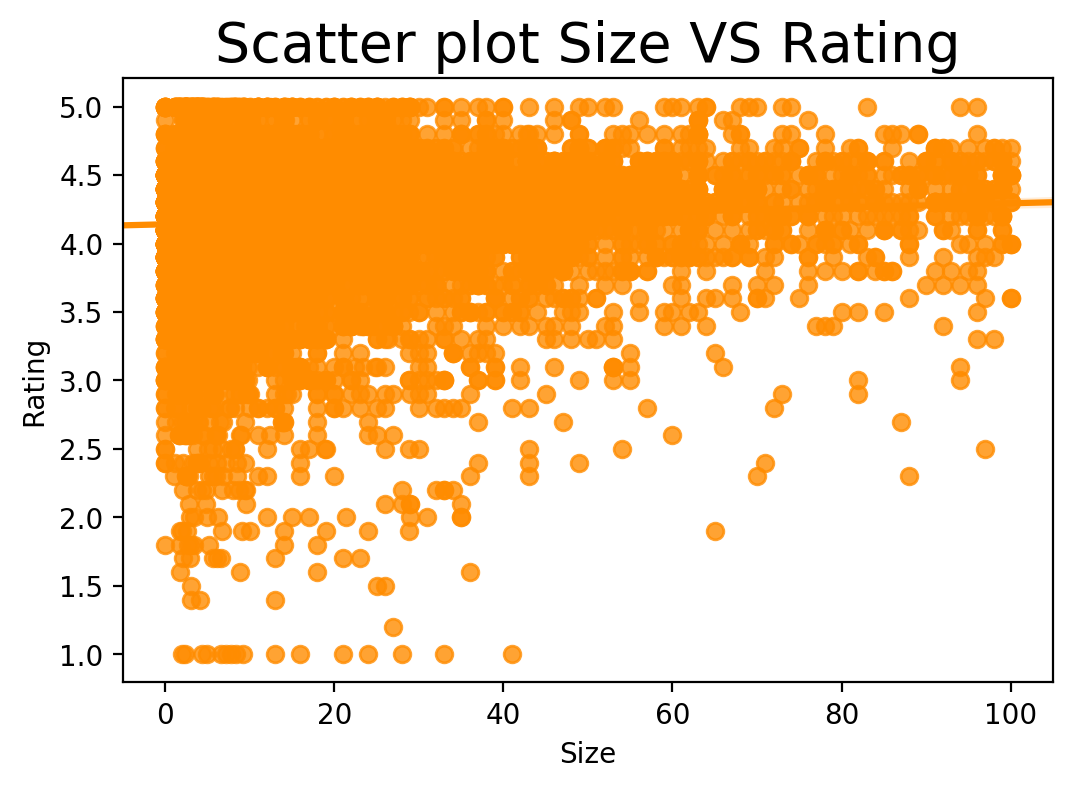

In [999]:
plt.figure()
plt.figure(dpi=200)
sns.regplot(x=data["Size"], y=data["Rating"], color = 'darkorange')
plt.title('Scatter plot Size VS Rating',size = 20)